# [[데이콘] 영화 리뷰 감성 분석](https://dacon.io/competitions/official/235995/overview/description)

**참고 사이트**  
[【실습】 Python >> Text Mining -- 감성 분류 분석 (호텔 리뷰 데이터)](https://hyemin-kim.github.io/2020/08/29/E-Python-TextMining-2/)  
[[자연어 처리] konlpy 설치 오류, okt()에러-already loaded in](https://byeon-sg.tistory.com/entry/%EC%9E%90%EC%97%B0%EC%96%B4-%EC%B2%98%EB%A6%AC-konlpy-%EC%84%A4%EC%B9%98-%EC%98%A4%EB%A5%98-okt%EC%97%90%EB%9F%AC-already-loaded-in-another-classloader-SystemErro-1)  
[tqdm 사용법-python 진행률 프로세스바](https://skillmemory.tistory.com/entry/tqdm-%EC%82%AC%EC%9A%A9%EB%B2%95-python-%EC%A7%84%ED%96%89%EB%A5%A0-%ED%94%84%EB%A1%9C%EC%84%B8%EC%8A%A4%EB%B0%94)  
[Scikit-Learn의 문서 전처리 기능](https://datascienceschool.net/03%20machine%20learning/03.01.03%20Scikit-Learn%EC%9D%98%20%EB%AC%B8%EC%84%9C%20%EC%A0%84%EC%B2%98%EB%A6%AC%20%EA%B8%B0%EB%8A%A5.html)  
[감성 분석](https://datascienceschool.net/03%20machine%20learning/11.03%20%EA%B0%90%EC%84%B1%20%EB%B6%84%EC%84%9D.html)  
[classification_report로 평가 지표 확인하기
[출처] classification_report로 평가 지표 확인하기|작성자 6시 내 교양](https://blog.naver.com/PostView.naver?blogId=hannaurora&logNo=222498671200&parentCategoryNo=&categoryNo=41&viewDate=&isShowPopularPosts=true&from=search)  
[[ML] sklearn.pipeline](https://velog.io/@imfromk/MLsklearn-Pipeline)  
[[Machine Learning] 가짜 뉴스 분류 모델 - 파라미터 튜닝](https://hangjastar.tistory.com/169)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm # 코드 진행률 프로세스 바
import warnings
warnings.filterwarnings('ignore')

## 데이터 셋 불러오기

In [2]:
train = pd.read_csv('data/[기업은행 혁신리그 사전강의] 영화 리뷰 감성 분석/train.csv')
train.head()

,id,document,label
0,1,아 더빙.. 진짜 짜증나네요 목소리,0
1,2,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1
2,3,너무재밓었다그래서보는것을추천한다,0
3,4,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,0
4,5,사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...,1


In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   id        150000 non-null  int64 
 1   document  149995 non-null  object
 2   label     150000 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 3.4+ MB


In [4]:
# 결측치 확인
train.isnull().sum()

id          0
document    5
label       0
dtype: int64

In [5]:
# 결측치 행 확인
train[train['document'].isnull()]

,id,document,label
25857,25858,NaN,1
55737,55738,NaN,1
110014,110015,NaN,0
126782,126783,NaN,0
140721,140722,NaN,0


In [6]:
# 결측치 행 제거
train.dropna(axis=0, inplace=True)

# 결측치 확인
train.isnull().sum()

id          0
document    0
label       0
dtype: int64

In [7]:
len(train)

149995

## 텍스트 데이터 전처리

### 정규 표현식 적용

In [8]:
# 정규 표현식 함수 정의
import re

def apply_regular_expression(text):
    hangle = re.compile('[^ ㄱ-ㅣ 가-힣]') # 한글 추출 규칙: 띄어 쓰기(1개)를 포함한 한글
    result = hangle.sub("", text) # 위에 설정한 "hangul"규칙을 "text"에 적용(.sub)시킴
    return result

In [9]:
train['document_perprocess'] = train['document'].apply(apply_regular_expression)
train

,id,document,label,document_perprocess
0,1,아 더빙.. 진짜 짜증나네요 목소리,0,아 더빙 진짜 짜증나네요 목소리
1,2,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1,흠포스터보고 초딩영화줄오버연기조차 가볍지 않구나
2,3,너무재밓었다그래서보는것을추천한다,0,너무재밓었다그래서보는것을추천한다
3,4,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,0,교도소 이야기구먼 솔직히 재미는 없다평점 조정
4,5,사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...,1,사이몬페그의 익살스런 연기가 돋보였던 영화스파이더맨에서 늙어보이기만 했던 커스틴 던...
...,...,...,...,...
149995,149996,인간이 문제지.. 소는 뭔죄인가..,0,인간이 문제지 소는 뭔죄인가
149996,149997,평점이 너무 낮아서...,1,평점이 너무 낮아서
149997,149998,이게 뭐요? 한국인은 거들먹거리고 필리핀 혼혈은 착하다?,0,이게 뭐요 한국인은 거들먹거리고 필리핀 혼혈은 착하다
149998,149999,청춘 영화의 최고봉.방황과 우울했던 날들의 자화상,1,청춘 영화의 최고봉방황과 우울했던 날들의 자화상


### ~~한글 맞춤법 검사~~
처리 시간 문제로 생략

In [64]:
# # !pip install py-hanspell
# from hanspell import spell_checker

# # 동작 테스트
# sent_test = "한글 맞춤법검사기 재대로작동돼는지테스트"
# spelled_sent_test = spell_checker.check(sent_test)
# checked_sent_test = spelled_sent_test.checked

# print("<맞춤법 검사 테스트 수행>")
# print("교정 前: ",sent_test)
# print("교정 後: ",checked_sent_test)

In [63]:
# for i in tqdm(range(len(train_data))):
#   try:
#     train_data_spell = spell_checker.check(train_data['document'][i]) # 교정할 맞춤법이 존재한다면 맞춤법 교정 수행
#     train_data['document'][i] = train_data_spell.checked
#   except: # 아니면 기존 데이터 유지
#     pass

### ~~한국어 형태소 분석~~

In [5]:
# !pip install konlpy
# from konlpy.tag import Okt
# from collections import Counter

In [66]:
# okt = Okt()  # 명사 형태소 추출 함수
# nouns = okt.nouns(apply_regular_expression(train_data['document'][0]))
# nouns

In [67]:
# 말뭉치 생성
# corpus = "".join(train_data['document'].tolist())
# corpus

In [10]:
# 전체 말뭉치(corpus)에서 명사 형태소 추출
# apply_regular_expression(corpus)
# nouns = okt.nouns(apply_regular_expression(corpus))
# print(nouns)

In [9]:
# 빈도 탐색
# counter = Counter(nouns)

# 상위 빈도 10개 단어
# counter.most_common(10)

In [10]:
# 한 글자 명사 제거
# available_counter = []

# for i in range(len(nouns)):
#     if len(nouns[i]) > 1:
#         available_counter.append(nouns[i])

# 빈도 탐색        
# available_counter = Counter(available_counter)

# 한 글자 명사를 제거한 상위 빈도 10개 단어
# available_counter.most_common(10)

### 불용어 사전 
RANKS NL에 제공해주는 한국어 불용어 사전 활용

In [11]:
# stopwords = pd.read_csv("https://raw.githubusercontent.com/yoonkt200/FastCampusDataset/master/korean_stopwords.txt").values.tolist()
# stopwords[:10]

In [13]:
# add_stopwords = ['구먼', '무재', '밓었', '해도', '그것', '볼때', '년대', '로만', '다지', '자꾸', '이기', '갈수록', '그냥', '절대', '나름',
#                '베트', '짤랐을꺼', '는걸', '다시', '한번', '아시', '뭥미', '지나', '또한', '지금', '다가']
# for word in add_stopwords:
#     stopwords.append(word)

### ~~Word Count~~  
#### ~~Bow 벡터 생성~~  
- ~~CountVectorizer는 띄어쓰기만을 기준으로 단어를 자른 후에 BoW를 만듦~~  
- ~~영어의 경우 띄어쓰기만으로 토큰화가 수행되기 때문에 문제가 없지만 한글에 CountVectorizer를 적용하면, 조사 등의 이유로 제대로 BoW가 만들어지지 않음~~  
- ~~예를 들어 "봄과"와 "봄이"를 다르게 인식하기 때문에 CountVectorizer 사용 전에 어간 추출을 해 "봄"으로 통일시켜 주는 것이 좋음~~  

RAM 용량 문제로 pass

In [14]:
# from sklearn.feature_extraction.text import CountVectorizer

# def text_cleaning(text):
#     hangle = re.compile('[^ ㄱ-ㅣ 가-힣]') # 정규 표현식 처리
#     result = hangle.sub("", text)
#     okt = Okt() # 형태소 추출
#     nouns = okt.nouns(result)
#     nouns = [x for x in nouns if len(x) > 1] # 한 글자 키워드 제거
#     nouns = [x for x in nouns if x not in stopwords] # 불용어 제거
#     return nouns
    
# vect = CountVectorizer(tokenizer = lambda x: text_cleaning(x)) # CountVectorizer: 문서 집합에서 단어 토큰을 생성하고 각 단어의 수를 세어 BOW 인코딩 벡터를 만듦
# bow_vect = vect.fit_transform(train_data['document'].tolist()) # vect를 'document'(→ list)에 적용
# word_list = vect.get_feature_names() # 문서에 등장한 단어 리스트
# count_list = bow_vect.toarray().sum(axis=0) # 각 단어가 전체 리뷰 중에 등장한 총 횟수

In [15]:
# 각 단어의 리뷰별 등장 횟수
# bow_vect.toarray()

In [16]:
# bow_vect.toarray()을 실행할 때 행, 열 개수
# bow_vect.shape

In [17]:
# "단어" - "총 등장 횟수" Matching
# word_count_dict = dict(zip(word_list, count_list))
# word_count_dict

### ~~TF-IDF 적용~~
#### ~~TF-IDF 변환~~
~~Bag of Words 벡터에 대해서 TF-IDF 변환을 진행함~~

## 감성 분류

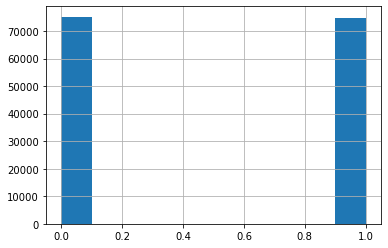

In [24]:
train['label'].hist();

In [25]:
train['label'].value_counts()

0    75170
1    74825
Name: label, dtype: int64

In [11]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import f1_score

In [12]:
# train 데이터를 train_data, val-data로 분류
data = train.drop(['id', 'document'], axis = 1).copy()
train_data, val_data = train_test_split(data, test_size=.3) # 7:3 비율로 분할
# train_data.reset_index(inplace=True)
# val_data.reset_index(inplace=True)

print('학습시킬 train 셋 : ', train_data.shape)
print('검증할 val 셋 : ', val_data.shape)

학습시킬 train 셋 :  (104996, 2)
검증할 val 셋 :  (44999, 2)


In [13]:
train_data.head()

,label,document_perprocess
62906,0,어젯밤 영화잘고르는 에서 봤는데 못본영화라 잼있긴했는데 전에나온 년년작 고전 스타탄...
53694,1,겨울밤 새벽에 보다가 감성폭팔하는영화후반우에 카메라짊어지고 석양이 지는 황혼을 걷던...
125888,0,범죄미화영화 이런영화가 청소년 모방범죄를 일으킬수있다
2281,0,처넌 주고 봤는데 평점에 낚여서 괜히 본듯 평점도 제대로 씁시다 진짜 허접영화를 점...
69620,0,유치하고 개연성없는 전개를 좋아한다면 꼭 보세요 두번보세요나만본건 억울하다어차피 초...


In [29]:
val_data.head()

,label,document_perprocess
93806,1,이태성 정말 연기 잘한다가슴이 따뜻해지는 영화다
25470,0,ㅎㅎ 망할
48336,1,윌리엄 월레스가 있어서 지금의 스코틀랜드가 있지 독립과 자유는 이렇게 소중한 것인데...
10939,0,마누라불륜녀랑 친구먹고 남편 혼내주는게 말이 되나 진짜 재미없다
133446,1,아 맨 마지막 마리모이야기 보다가 울었어요 개 기르시는 분들은 다 그랬을듯


In [25]:
# 테스트 데이터 불러오기
test_data = pd.read_csv('data/[기업은행 혁신리그 사전강의] 영화 리뷰 감성 분석/test.csv')
test_data.head()

,id,document
0,1,굳 ㅋ
1,2,GDNTOPCLASSINTHECLUB
2,3,뭐야 이 평점들은.... 나쁘진 않지만 10점 짜리는 더더욱 아니잖아
3,4,지루하지는 않은데 완전 막장임... 돈주고 보기에는....
4,5,3D만 아니었어도 별 다섯 개 줬을텐데.. 왜 3D로 나와서 제 심기를 불편하게 하죠??


In [26]:
test_data.isnull().sum()

id          0
document    3
dtype: int64

In [27]:
# 결측치 행 제거
test_data.dropna(axis=0, inplace=True)

# 결측치 확인
test_data.isnull().sum()

id          0
document    0
dtype: int64

In [29]:
X_test = test_data['document']
X_test.head()

0                                                  굳 ㅋ
1                                 GDNTOPCLASSINTHECLUB
2               뭐야 이 평점들은.... 나쁘진 않지만 10점 짜리는 더더욱 아니잖아
3                     지루하지는 않은데 완전 막장임... 돈주고 보기에는....
4    3D만 아니었어도 별 다섯 개 줬을텐데.. 왜 3D로 나와서 제 심기를 불편하게 하죠??
Name: document, dtype: object

In [15]:
train_data_X = train_data.document_perprocess
train_data_y = train_data.label

val_data_X = val_data.document_perprocess
val_data_y = val_data.label

### model1 나이브 베이즈 모형 + CountVectorizer
- CountVectorizer: 각 단어가 문서에서 몇 번 등장했는지를 기반으로 문서를 벡터화함
    - 하지만 'a', 'the'처럼 많이 등장하는 것에 대해 높은 중요도가 있다가 판단하기에 한계점 존재

In [16]:
# 나이브 베이즈 모형으로 학습
model1 = Pipeline([
    ('vect', CountVectorizer()),
    ('mb', MultinomialNB())
])

# %%time
model1.fit(train_data_X, train_data_y)

# classification_report을 이용한 성능 평가
# support: 각 라벨의 실제 샘플 개수
# macro avg: 각 클래스 별로 동일한 가중치 부여(샘플 개수의 불균형을 고려하지 않음) → 소수 클래스에 대한 성능이 낮을 때 더 큰 패널티 발생
# f1 macro avg = (0.81+0.08)/2 = 0.80
# weighted avg: 각 클래스에 속하는 표본의 개수로 가중 평균 계산(샘플 개수의 불균형 고려) → 샘플 개수가 적은 클래스의 영향력 감소
print('사용 모델: 나이브 베이즈 모델')
print(classification_report(val_data_y, model1.predict(val_data_X)))

# calculate f1
mean_f1 = f1_score(val_data_y, model1.predict(val_data_X), average='micro')
print("mean_f1 :", mean_f1)

사용 모델: 나이브 베이즈 모델
              precision    recall  f1-score   support

           0       0.79      0.83      0.81     22632
           1       0.81      0.77      0.79     22367

    accuracy                           0.80     44999
   macro avg       0.80      0.80      0.80     44999
weighted avg       0.80      0.80      0.80     44999

mean_f1 : 0.800306673481633


### model2 logistic regression + CountVectorizer

In [36]:
from sklearn.linear_model import LogisticRegression
model2 = Pipeline([
    ('vect', CountVectorizer()), # 각 텍스트에서 단어 출현 횟수를 카운팅한 벡터
    ('clf', LogisticRegression())
])

# %%time
model2.fit(train_data_X, train_data_y)

# classification_report을 이용한 성능 평가
print('사용 모델: 로지스틱 회귀분석')
print(classification_report(val_data_y, model2.predict(val_data_X)))

# calculate f1
mean_f1 = f1_score(val_data_y, model2.predict(val_data_X), average='micro')
print("mean_f1 :", mean_f1)

Pipeline(steps=[('vect', CountVectorizer()), ('clf', LogisticRegression())])

### model3 LinearSVC + CountVectorizer + TfidfTransformer
- TfidfTransformer(TF-IDF): 중요하지 않은 단어에 가중치를 조금만 주어서 문서 벡터의 방향이 좀 더 중요한 단어들에 의해 좌우도리 수 있도록함

In [39]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfTransformer
from sklearn.svm import LinearSVC

model3 = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()), # TF-IDF라는 값을 사용하여 CountVectorizer의 단점을 보완함
    ('clf', LinearSVC())
])

model3.fit(train_data_X, train_data_y)

# classification_report을 이용한 성능 평가
print('사용 모델: SVM')
print(classification_report(val_data_y, model3.predict(val_data_X)))

# calculate f1
mean_f1 = f1_score(val_data_y, model3.predict(val_data_X), average='micro')
print("mean_f1 :", mean_f1)

Pipeline(steps=[('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('clf', LinearSVC())])

### model4 LinearSVC + CountVectorizer + TfidfTransformer
- Pipeline with Cross-Validation (GridSearchCV)

In [46]:
model4 = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()), # TF-IDF라는 값을 사용하여 CountVectorizer의 단점을 보완함
    ('clf', LinearSVC())
])

param_grid = [
    {
        'vect__max_df': [.8, .9, 1.],
        'clf__penalty': ['l2'],
        'clf__dual': [True, False]
    },
    {
        'vect__max_df': [.8, .9, 1.],
        'clf__penalty': ['l2'],
        'clf__dual': [True, False]
    }
]

gs = GridSearchCV(estimator=model4, cv=3, param_grid=param_grid, scoring='f1_micro')
gs.fit(train_data_X, train_data_y)

# summarize results
print("Best: %f using %s" % (gs.best_score_, gs.best_params_)) 

# 최적 파라미터를 이용해 새로운 모델 생성
opt_model4 = gs.best_estimator_

Best: 0.783573 using {'clf__dual': False, 'clf__penalty': 'l2', 'vect__max_df': 0.8}


In [47]:
# classification_report을 이용한 성능 평가
print('사용 모델: SVM')
print(classification_report(val_data_y, opt_model4.predict(val_data_X)))

# calculate f1
mean_f1 = f1_score(val_data_y, opt_model4.predict(val_data_X), average='micro')
print("mean_f1 :", mean_f1)

사용 모델: SVM
              precision    recall  f1-score   support

           0       0.78      0.83      0.80     22642
           1       0.81      0.76      0.79     22357

    accuracy                           0.79     44999
   macro avg       0.80      0.79      0.79     44999
weighted avg       0.80      0.79      0.79     44999

mean_f1 : 0.7939287539723104


### model5 나이브 베이즈 모형 + CountVectorizer + TfidfTransformer
- Pipeline with Cross-Validation (GridSearchCV)

In [49]:
# 나이브 베이즈 모형으로 학습
model5 = Pipeline([
    ('vect', CountVectorizer()),
    ('mb', MultinomialNB())
])

param_grid = [
    {
        'vect__max_df': [.8, .9, 1.],
        'mb__alpha': [0.25, 0.5 ,1],
        'mb__fit_prior': [True, False]
    },
    {
        'vect__max_df': [.8, .9, 1.],
        'mb__alpha': [0.25, 0.5 ,1],
        'mb__fit_prior': [True, False]
    }
]

gs = GridSearchCV(estimator=model5, cv=3, param_grid=param_grid, scoring='f1_micro')
gs.fit(train_data_X, train_data_y)

# summarize results
print("Best: %f using %s" % (gs.best_score_, gs.best_params_)) 

# 최적 파라미터를 이용해 새로운 모델 생성
opt_model5 = gs.best_estimator_

Best: 0.794383 using {'mb__alpha': 1, 'mb__fit_prior': True, 'vect__max_df': 0.8}


In [51]:
# classification_report을 이용한 성능 평가
print('사용 모델: 나이브 베이즈 모델')
print(classification_report(val_data_y, opt_model5.predict(val_data_X)))

# calculate f1
mean_f1 = f1_score(val_data_y, opt_model5.predict(val_data_X), average='micro')
print("mean_f1 :", mean_f1)

사용 모델: 나이브 베이즈 모델
              precision    recall  f1-score   support

           0       0.79      0.83      0.81     22642
           1       0.82      0.78      0.80     22357

    accuracy                           0.80     44999
   macro avg       0.80      0.80      0.80     44999
weighted avg       0.80      0.80      0.80     44999

mean_f1 : 0.8023733860752461


총 5개의 모델 성능 평가 결과, model1의 성능이 높게 측정되었음

In [17]:
submission = pd.read_csv('data/[기업은행 혁신리그 사전강의] 영화 리뷰 감성 분석/sample_submission.csv')
submission.head()

,id,label
0,1,-1
1,2,-1
2,3,-1
3,4,-1
4,5,-1


In [21]:
X_test

0                                                      굳 ㅋ
1                                     GDNTOPCLASSINTHECLUB
2                   뭐야 이 평점들은.... 나쁘진 않지만 10점 짜리는 더더욱 아니잖아
3                         지루하지는 않은데 완전 막장임... 돈주고 보기에는....
4        3D만 아니었어도 별 다섯 개 줬을텐데.. 왜 3D로 나와서 제 심기를 불편하게 하죠??
                               ...                        
49995            오랜만에 평점 로긴했네ㅋㅋ 킹왕짱 쌈뽕한 영화를 만났습니다 강렬하게 육쾌함
49996         의지 박약들이나 하는거다 탈영은 일단 주인공 김대희 닮았고 이등병 찐따 OOOO
49997                   그림도 좋고 완성도도 높았지만... 보는 내내 불안하게 만든다
49998       절대 봐서는 안 될 영화.. 재미도 없고 기분만 잡치고.. 한 세트장에서 다 해먹네
49999                                           마무리는 또 왜이래
Name: document, Length: 50000, dtype: object

In [31]:
model1_df = submission.copy()
model1_df

,id,label
0,1,-1
1,2,-1
2,3,-1
3,4,-1
4,5,-1
...,...,...
49995,49996,-1
49996,49997,-1
49997,49998,-1
49998,49999,-1


In [32]:
# 테스트 데이터를 이용한 예측 y값 생성
y_pred = model1.predict(X_test)

# 예측 y값 제출 데이터에 입력
model1_df = submission.copy()
model1_df['label'] = y_pred
print(model1_df.head())

# 제출 데이터 저장
# model1_df.to_csv('data/[기업은행 혁신리그 사전강의] 영화 리뷰 감성 분석/', index=False)

ValueError: Length of values (49997) does not match length of index (50000)